In [1]:
import mmcv
import mmengine
import matplotlib.pyplot as plt

In [2]:
data_root = '/data/CHASE_DB1'
img_dir = "images"
ann_dir = 'annotations'

#TODO: Figure out how to integrate this into the base Chase_DB1 dataset
classes = ('background','vessel')
palette = [[1,1,1],[0,0,0]]

Show a sample image

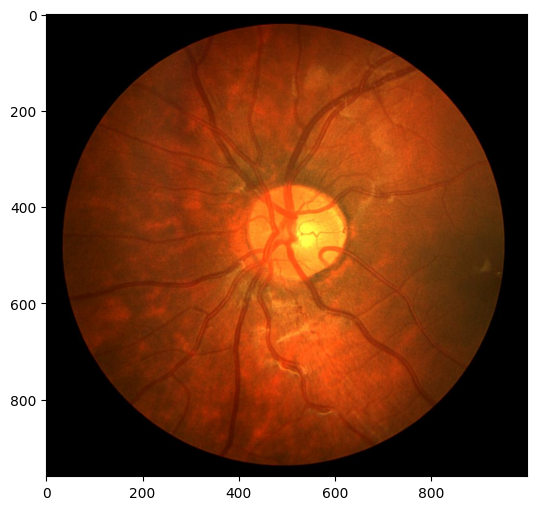

In [3]:
#show image
img = mmcv.imread('/data/CHASE_DB1/images/training/Image_01L.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


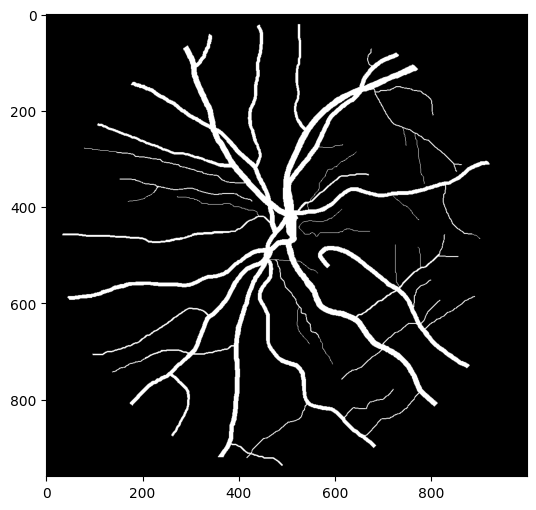

In [4]:
#show label
img = mmcv.imread('/data/CHASE_DB1/annotations/training/Image_01L_1stHO.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img * 256))
plt.show()

In [5]:
#load the configureation
from mmengine import Config
cfg = Config.fromfile('../../submodules/lib-avstack-core/third_party/mmsegmentation/configs/unet/unet-s5-d16_fcn_4xb4-40k_chase-db1-128x128.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(128, 128))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(128, 128)),
    pretrained=None,
    backbone=dict(
        type='UNet',
        in_channels=3,
        base_channels=64,
        num_stages=5,
        strides=(1, 1, 1, 1, 1),
        enc_num_convs=(2, 2, 2, 2, 2),
        dec_num_convs=(2, 2, 2, 2),
        downsamples=(True, True, True, True),
        enc_dilations=(1, 1, 1, 1, 1),
        dec_dilations=(1, 1, 1, 1),
        with_cp=False,
        conv_cfg=None,
        norm_cfg=dict(type='SyncBN', requires_grad=T

In [6]:
#setup the correct paths
cfg.data_root = data_root
cfg.train_dataloader.dataset.dataset.data_root = data_root
cfg.val_dataloader.dataset.data_root = data_root
cfg.test_dataloader = cfg.val_dataloader
#Load the pretrained weights
cfg.load_from = '/models/mmseg/checkpoints/CHASE_DB1/fcn_unet_s5-d16_128x128_40k_chase_db1_20201223_191051-11543527.pth'

#setup the working directory
cfg.work_dir = '/models/mmseg/work_dirs/CHASE_DB1'

#edit the training configuration for the number of loops
cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200

#setup logging
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

#set random seed
cfg['randomness'] = dict(seed=0)

print(f'Config:/n{cfg.pretty_text}')

Config:/nnorm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(128, 128))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(128, 128)),
    pretrained=None,
    backbone=dict(
        type='UNet',
        in_channels=3,
        base_channels=64,
        num_stages=5,
        strides=(1, 1, 1, 1, 1),
        enc_num_convs=(2, 2, 2, 2, 2),
        dec_num_convs=(2, 2, 2, 2),
        downsamples=(True, True, True, True),
        enc_dilations=(1, 1, 1, 1, 1),
        dec_dilations=(1, 1, 1, 1),
        with_cp=False,
        conv_cfg=None,
        norm_cfg=dict(type='SyncBN', requires_grad=

In [7]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

PermissionError: [Errno 13] Permission denied: '/models/mmseg/work_dirs/CHASE_DB1/20230726_193922'

In [ ]:
runner.train()

07/26 19:12:59 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by local backend from path: /models/mmseg/checkpoints/CHASE_DB1/fcn_unet_s5-d16_128x128_40k_chase_db1_20201223_191051-11543527.pth
07/26 19:12:59 - mmengine - INFO - Load checkpoint from /models/mmseg/checkpoints/CHASE_DB1/fcn_unet_s5-d16_128x128_40k_chase_db1_20201223_191051-11543527.pth
07/26 19:12:59 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
07/26 19:12:59 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
07/26 19:12:59 - mmengine - INFO - Checkpoints will be saved to /models/mmseg/work_dirs/CHASE_DB1.
07/26 19:13:03 - mmengine - INFO - Iter(train) [ 10/200]  lr: 9.9980e-03  eta: 0:01:10  time: 0.3736  data_time: 0.0019  memory: 2498  loss: 0.1485  decode.loss_ce: 0.1060  decode.acc_seg: 92.5690  aux

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): UNet(
    (encoder): ModuleList(
      (0): Sequential(
        (0): BasicConvBlock(
          (convs): Sequential(
            (0): ConvModule(
              (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): _BatchNormXd(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (activate): ReLU(inplace=True)
            )
            (1): ConvModule(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): _BatchNormXd(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (activate): ReLU(inplace=True)
            )
          )
        )
      )
      (1): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): BasicConvBlock(
          (convs): Sequential(
            (0): ConvModule(
  

/home/amir/Documents/radar-dev/submodules/lib-avstack-core/third_party/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/home/amir/Documents/radar-dev/submodules/lib-avstack-core/third_party/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/amir/Documents/radar-dev/submodules/lib-avstack-core/third_party/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, s

Loads checkpoint by local backend from path: /models/mmseg/work_dirs/CHASE_DB1/iter_200.pth
07/26 19:34:06 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


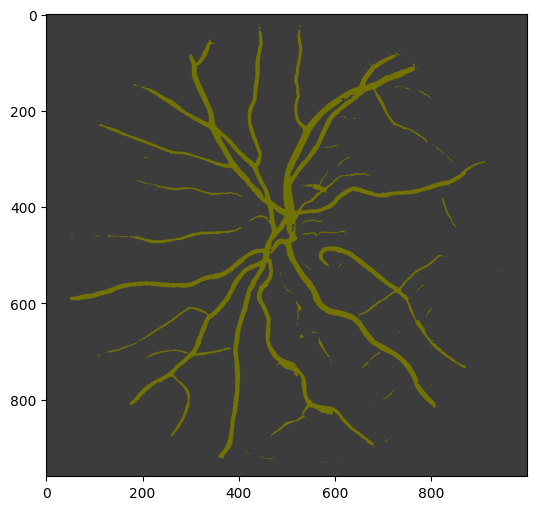

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = '/models/mmseg/work_dirs/CHASE_DB1/iter_200.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

img = mmcv.imread('/data/CHASE_DB1/images/training/Image_01L.png')
label = mmcv.imread('/data/CHASE_DB1/annotations/training/Image_01L_1stHO.png')
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, label, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


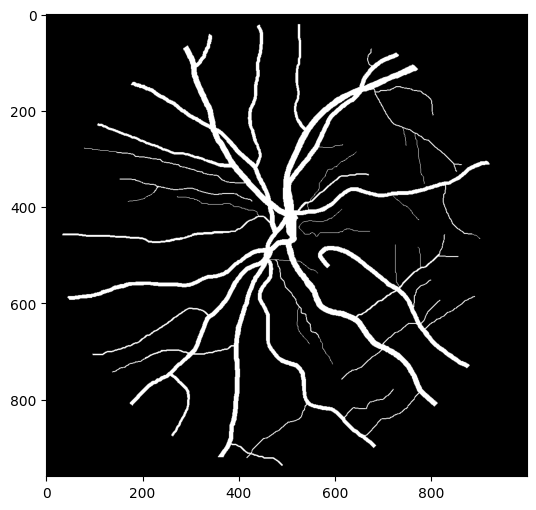

In [ ]:
#show label
img = mmcv.imread('/data/CHASE_DB1/annotations/training/Image_01L_1stHO.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img * 256))
plt.show()